<h1 align="center"> MACHINE LEARNING </h1>




**Project :** Credit Card Fraud Detection With Machine Learning

<h1 align="center"> PLAN   </h1>

<h2>INTRODUCTION</h2>

I. <b>PREMIER CONTACT</b><br>
a) [Importation](#debut)<br>
b) [Visualisation](#1)<br><br>
....  i) [Rapport Résumé avec Pandas-Profiling ](#pp)<br><br>
....  ii) [Matrices de Correlation](#2)<br><br>
c) [Test des Modèles](#3)<br><br>
....  i) [Random Forest](#4)<br><br>
.......     -) [Interpretation du Random Forest](#5)<br><br>
  ii) [SVM](#6)<br><br>
.......     -) [Interpretation du SVM](#7)<br><br>
....  iii) [Reseau de Neurones](#8)<br><br>
.......     -) [Interpretation du Reseau de Neurones](#9)<br><br>
<b>Conclusion  Partielle</b><br>  

II. <b>PREPROCESSING</b><br>
a) [Séparation et Visualisation](#10)<br>
b) [Scaling](#12)<br><br>

III) <b>Sur-échantillonnage avec imblearn</b><br>
A. [Fitting model](#fm)</b><br>
.... a) [Random Forest](#15)<br>
.... b) [SVM](#16)<br>
.... c) [RESEAU DE NEURONES](#17)<br>


IV. <b>Sous-echantillonage</b><br>
A) [Normalisation de notre données d'entrainement](#19)<br>
B) [Application des modèles](#20)<br>
.... a) [Random Forest](#21)<br>
.... b) [SVM](#22)<br>
.... c) [RESEAU DE NEURONES](#23)<br>

<h2>CONCLUSION </h2>


# I.  PREMIER CONTACT

## Importation
<a id="debut"></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from visualization import viz_data
import warnings
warnings.filterwarnings("ignore")

In [3]:
dt = pd.read_csv('/Users/khadygaye/Documents/Fraud Card detection /creditcard.csv')

In [4]:
dt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Rapport Résumé avec Pandas-Profiling
<a id="pp"></a>

In [5]:
# from pandas_profiling import profile_report# permet de faire l'analyse exploratoire des données
# dt_report=dt.profile_report()
# dt_report

In [6]:
#dt.describe().T

## Visualisation
<a id="1"></a>

### Matrices de Correlation  
<a id="2"></a>

La représentation des matrices de corrélation est une étape inspensable à la compréhension de nos données. Nous voulons savoir s'il existe des caractéristiques qui influencent le plus sur le fait qu'une transaction soit une fraude ou non.


In [7]:
mat_cor = dt.corr().round(decimals=2)


In [8]:
# plt.figure(figsize=(24, 20))
# f, (ax1) = plt.subplots(1, 1, figsize=(15,10))
# sns.heatmap(mat_cor, annot_kws={'size':50}, ax=ax1)
# ax1.set_title("Matrice de Correlation \n", fontsize=10)

**V17, V14, V12, V10 et V7 sont négativement correlées avec la variable Classe. Or plus ces valeurs sont faibles, plus le résultat final est susceptible d'être une transaction frauduleuse. Aussi V2, V4, V10, V11 et V19 sont correlées positivement avec la variable Class. Et plus ces valeurs sont deviennent grandes plus, plus plus il y a de chances pour que le résultat soit une transaction frauduleuse.**

## Test des Modèles
<a id="3"></a>

In [9]:
# Séparation des features et du Target
feature = dt.iloc[:, 0:30].columns
ft = dt[feature]
target = dt.iloc[:1, 30: ].columns
tg = dt[target]
print(ft),print(tg)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

(None, None)

In [10]:
tg.value_counts()

Class
0        284315
1           492
dtype: int64

In [11]:
# Split de nos données
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(ft,tg,test_size=0.2,random_state=42)

## PREPROCESSING
<a id="10"></a>

## Séparation et Visualisation
<a id="11"></a>

In [12]:
# Separating feature and targer of the dataset
feature = dt.iloc[:, 0:30].columns
ft = dt[feature]
ft

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [13]:
ft.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [14]:
target = dt.iloc[:1, 30: ].columns
tg = dt[target]
tg

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


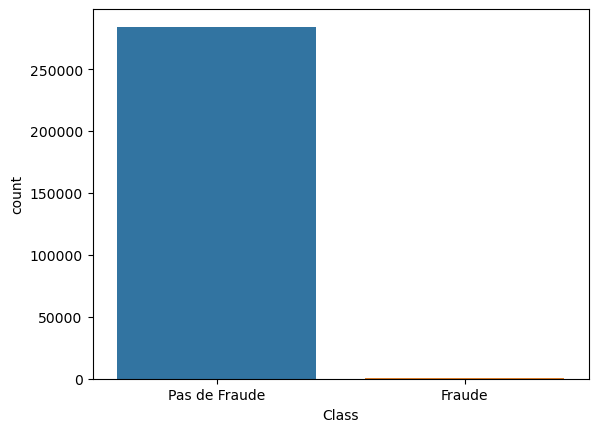

In [15]:
# visualisation de la variable Class
cl= sns.countplot(dt['Class'])
cl.set_xticklabels(['Pas de Fraude','Fraude'])
plt.show()

In [16]:
# Séparation des Class==1 et class==0
Fraude = dt[dt['Class']==1]

Pas_Fraude = dt[dt['Class']==0]

print('La taille des Fraudes: ',Fraude.shape)
print('La taille des  Pas-Fraudes: ',Pas_Fraude.shape)

La taille des Fraudes:  (492, 31)
La taille des  Pas-Fraudes:  (284315, 31)


## Scaling
<a id="12"></a>

En lisant la matrice de Corrélation obtenue dans la section précedente, on peut envisager de 'Time' et 'Amount' afin de les amener au même echelle que les autres colonnes. Ainsi nous utiliserons "RoustScaler" de la librairie "slearn.preprocessing" parcequ'il est plus tolérant aux outliers

In [17]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

# Sous-echantillonage
<a id="18"></a>


In [18]:
df = dt

Dans cette partie nous essayons d'équilibrer les données de notre variable cible 'Class'.
 On utilisons Ainsi la méthode du sous-échantillonnage aléatoire ou 'Under-Sampling aléatoire
 L'objectif ici est de supprimer aléatoirement certaines observations de la classe majoritaire et de répéter l'opération jusqu'à ce que la classe majoritaire et minoritaire soit équilibrée.

Le sous-échantillonnage peut être un bon choix lorsque nos donnéessont de taille importante. Mais son inconvénient est que parfois nous supprimons les informations qui peuvent être précieuses.

In [19]:
non_fraude = df[df["Class"]==0]
fraude=df[df["Class"]==1]
non_fraude.shape
a=fraude.shape

In [20]:
non_fraude = non_fraude.sample(fraude.shape[0])
non_fraude.shape

(492, 31)

In [21]:
# Sous echantillage des données
df_new= fraude.append(non_fraude ,ignore_index = True)
df_new.shape

(984, 31)

In [22]:
Y_under = df_new['Class']
X_under =df_new.iloc[:,:-1]
X_under

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,32709.0,0.983365,-0.103347,0.202949,1.267958,0.001655,0.359410,0.084214,0.117756,0.012759,...,0.014372,-0.018500,-0.030380,-0.191708,-0.290210,0.652748,-0.318941,0.021276,0.017413,92.00
980,9369.0,0.915012,-0.079906,0.448346,1.570747,-0.129422,0.223144,0.014704,0.023997,1.310127,...,-0.004475,-0.135305,-0.190221,-0.158736,-0.030639,0.568574,-0.379565,-0.011380,0.018121,117.00
981,87549.0,-2.810252,-3.296656,-0.098200,-2.009151,1.192710,0.380186,-0.683166,1.016874,-0.877135,...,0.982608,0.420132,-0.226777,0.814254,-1.693735,-0.959347,-0.800261,0.050430,-0.244918,283.86
982,45389.0,1.117734,-0.036619,0.402105,0.095383,-0.754428,-1.551740,0.346798,-0.363270,-0.047854,...,0.098985,-0.440521,-1.474965,0.281219,0.930597,-0.124620,0.503974,-0.103791,0.027229,79.70


In [23]:
X_train_under, X_test_under, y_train_under, y_test_under=train_test_split(X_under,Y_under)

## Normalisation de notre données d'entrainement
<a id="19"></a>

In [24]:
scater= RobustScaler()
X_train_under = scater.fit_transform(X_train_under)
X_test_under = scater.fit_transform(X_test_under)

## Application des modèles
<a id="20"></a>

### Random  Forest
<a id="21"></a>

In [25]:
# Importation des modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [26]:
model2=RandomForestClassifier(40)
model2.fit(X_train_under,y_train_under)

RandomForestClassifier(n_estimators=40)

Confusion Matrix
     train:y=0  train:y=1  test:y=0  test:y=1
y=0        354          0       126        12
y=1          0        384         8       100 


[[354   0]
 [  0 384]]


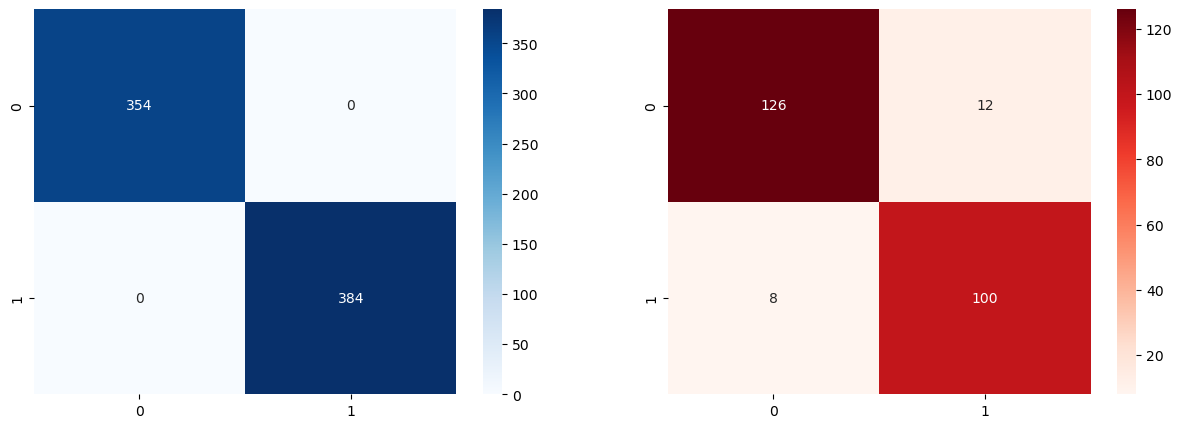

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       138
           1       0.89      0.93      0.91       108

    accuracy                           0.92       246
   macro avg       0.92      0.92      0.92       246
weighted avg       0.92      0.92      0.92       246



In [27]:

pred1 = model2.predict(X_train_under)
c_train_under = confusion_matrix(y_train_under, pred1)
pred = model2.predict(X_test_under)
c_test_under = confusion_matrix(y_test_under, pred)
print("Confusion Matrix")
print(pd.DataFrame(np.hstack([c_train_under, c_test_under]), index=["y=0", "y=1"],
                            columns="train:y=0 train:y=1 test:y=0 test:y=1".split()), "\n\n")


print(c_train_under)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(c_train_under,annot=True,cmap='Blues',fmt='0')

plt.subplot(1,2,2)
sns.heatmap(c_test_under,annot=True,cmap='Reds',fmt='0',xticklabels='auto',
    yticklabels='auto')
plt.show()
print(classification_report(y_test_under, pred))
sns.heatmap
plt.show()

**Dans le Random Forest, l'apprentissage est totale. Et de plus dans les données test, il a détecté environ 88% des fraudes.**

### SVM
<a id="22"></a>

In [28]:
from sklearn.svm import SVC

In [29]:
SVM1=SVC(C=1.0, kernel='linear')

In [30]:
SVM1.fit(X_train_under, y_train_under)

SVC(kernel='linear')

Confusion Matrix
     train:y=0  train:y=1  test:y=0  test:y=1
y=0        348          6       127        11
y=1         32        352         8       100 


[[348   6]
 [ 32 352]]


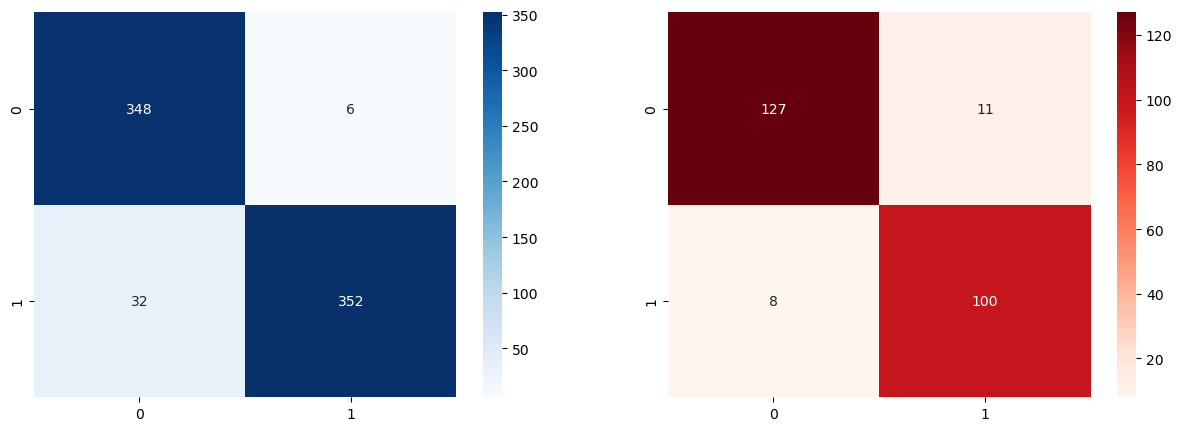

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       138
           1       0.90      0.93      0.91       108

    accuracy                           0.92       246
   macro avg       0.92      0.92      0.92       246
weighted avg       0.92      0.92      0.92       246



In [31]:

pred1 = SVM1.predict(X_train_under)
c_train_under = confusion_matrix(y_train_under, pred1)
pred = SVM1.predict(X_test_under)
c_test_under = confusion_matrix(y_test_under, pred)
print("Confusion Matrix")
print(pd.DataFrame(np.hstack([c_train_under, c_test_under]), index=["y=0", "y=1"],
                            columns="train:y=0 train:y=1 test:y=0 test:y=1".split()), "\n\n")


print(c_train_under)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(c_train_under,annot=True,cmap='Blues',fmt='0')

plt.subplot(1,2,2)
sns.heatmap(c_test_under,annot=True,cmap='Reds',fmt='0',xticklabels='auto',
    yticklabels='auto')
plt.show()
print(classification_report(y_test_under, pred))
sns.heatmap
plt.show()

In [32]:
114/(114+14)

0.890625

**Le SVM ici apprend pratiquement bien les données, et a une bonne généralisation sur les données test. Il a détecté environ 89% des fraudes.**

### Neural Network
<a id="23"></a>

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

: 

In [ ]:
# Initialisation du reseau
network1 = Sequential()

# Ajout de la couche d'entree et de la 1ere couche cachee
network1.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))

# Ajout de la 2eme couche cachee
network1.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))

# Ajout de la couche de sortie
network1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Fitting the ANN to the Training set
#network.fit(X_train_samp, y_train_samp, batch_size = 10, epochs = 5)


In [ ]:
network1.summary()

In [ ]:
network1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
network1.fit(X_train_under,y_train_under,batch_size=10,epochs=10)

In [ ]:
loss,score=network1.evaluate(X_test,y_test)
print("score: ",score)

In [ ]:
pred1 = network1.predict_classes(X_train_under)
c_train_under = confusion_matrix(y_train_under, pred1)
pred = network1.predict_classes(X_test_under)
c_test_under = confusion_matrix(y_test_under, pred)
print("Confusion Matrix")
print(pd.DataFrame(np.hstack([c_train_under, c_test_under]), index=["y=0", "y=1"],
                            columns="train:y=0 train:y=1 test:y=0 test:y=1".split()), "\n\n")


print(c_train_under)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(c_train_under,annot=True,cmap='Blues',fmt='0')

plt.subplot(1,2,2)
sns.heatmap(c_test_under,annot=True,cmap='Reds',fmt='0',xticklabels='auto',
    yticklabels='auto')
plt.show()
print(classification_report(y_test_under, pred))
sns.heatmap
plt.show()

**Ici, dans le cas de under-sampling, le réseau de neuronne détecte entièrement les non fraudes dans les données train et test. Par contre le modèle détecte un faible taux de fraudes dans les tests et les trains.**

<h1 align="center"> CONCLUSION </h1>

En résumé, le Random Forest est le modèle qui est a le plus fort taux de prédiction malgré le déséquilibre des classes dans les
données. Il est donc le modèle le plus adapté pour ce type de données. La technique d'équilibrage des données (oversampling et undersampling) a nettement  améliorer la détection des ces fraudes bien que en utilisant oversampling, on trouve que la taille des données double et le SVM met plus temps à s'executer.
